### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import datetime
import glob
import shutil
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

path = "/work/bb1096/b382180/ZRH/"
opath = "/work/bb1096/b382180/ZRH/outputs/temperature/"

### Read the dataset

In [2]:
dfz = pd.read_csv(path+"ZRH_all.csv", sep=",", index_col="time", parse_dates = True)
dfz.index = pd.to_datetime(dfz.index, format="%Y-%m-%d %H:%M:%S")
dfz

,Precipitation,Pressure (MSL),Radiation,Temperature,Temperature (Dew),Visibility,Relative Humidity,Wind Speed,Wind Direction
time,,,,,,,,,
2017-01-01 00:00:00,0.0,1028.6,3,-3.5,-4.1,1337.166667,95.3,2.3,230.0
2017-01-01 01:00:00,0.0,1028.0,3,-3.6,-4.5,1814.333333,93.8,2.1,220.0
2017-01-01 02:00:00,0.0,1027.4,3,-3.5,-4.5,2683.833333,92.9,2.8,220.0
2017-01-01 03:00:00,0.0,1026.7,3,-3.5,-4.4,2922.333333,93.8,2.1,200.0
2017-01-01 04:00:00,0.0,1026.1,3,-3.6,-4.4,3467.166667,94.5,1.8,220.0
...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,0.0,1027.6,3,7.0,5.1,17504.166667,87.8,2.9,140.0
2021-12-31 20:00:00,0.0,1027.9,2,6.3,4.6,10692.500000,88.6,2.2,130.0
2021-12-31 21:00:00,0.0,1028.1,2,4.9,4.2,5795.833333,95.5,2.2,110.0


### Data Engineering

In [3]:
dfz.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43824 entries, 2017-01-01 00:00:00 to 2021-12-31 23:00:00
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Precipitation      43823 non-null  float64
 1   Pressure (MSL)     43824 non-null  float64
 2   Radiation          43824 non-null  int64  
 3   Temperature        43824 non-null  float64
 4   Temperature (Dew)  43824 non-null  float64
 5   Visibility         43820 non-null  float64
 6   Relative Humidity  43824 non-null  float64
 7   Wind Speed         43664 non-null  float64
 8   Wind Direction     43664 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 3.3 MB


In [4]:
dfz.isnull().sum()

Precipitation          1
Pressure (MSL)         0
Radiation              0
Temperature            0
Temperature (Dew)      0
Visibility             4
Relative Humidity      0
Wind Speed           160
Wind Direction       160
dtype: int64

In [5]:
dfz.describe().T

,count,mean,std,min,25%,50%,75%,max
Precipitation,43823.0,0.107571,0.598991,0.0,0.000,0.0,0.0,37.2
Pressure (MSL),43824.0,1017.762087,8.015892,981.5,1013.800,1018.3,1022.5,1042.5
Radiation,43824.0,147.318227,235.537507,0.0,2.000,8.0,200.0,1031.0
Temperature,43824.0,10.510227,8.191942,-14.9,4.000,10.1,16.4,35.4
Temperature (Dew),43824.0,5.992061,6.504588,-24.2,0.900,5.9,11.5,22.1
Visibility,43820.0,16004.762161,6194.980496,56.0,13118.375,20000.0,20000.0,20000.0
Relative Humidity,43824.0,76.752051,18.515340,16.8,64.500,81.8,92.0,100.0
Wind Speed,43664.0,2.509390,1.718489,0.2,1.200,2.0,3.3,13.4
Wind Direction,43664.0,201.177171,105.707720,0.0,120.000,220.0,300.0,360.0


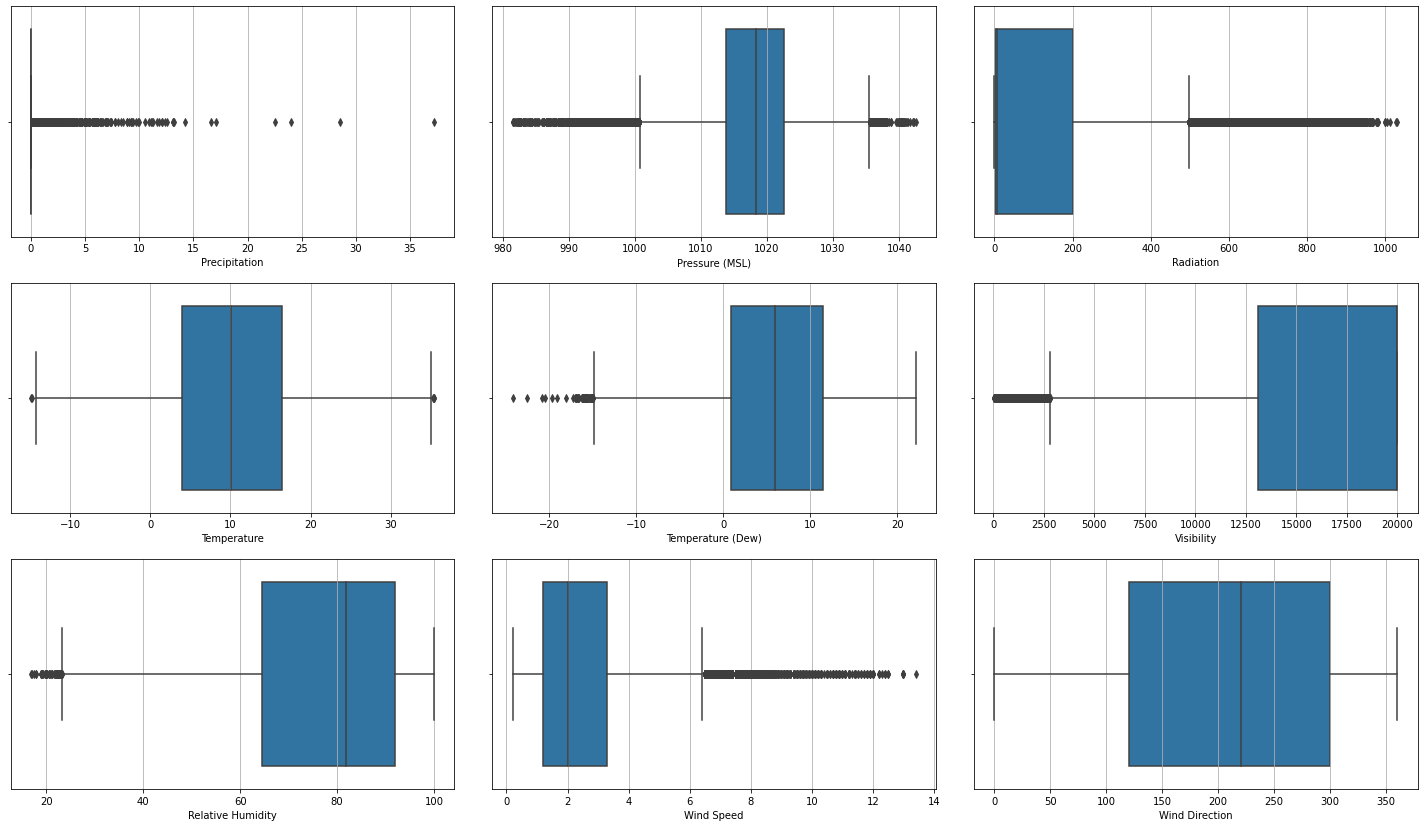

In [6]:
def boxplotit(data,x=4,y=3,drops=[]):
    index = 0
    plt.figure(figsize=(x*5, y*5))
    for feature in dfz.drop(drops,axis=1).columns:
        index += 1
        plt.subplot(x,y,index)
        plt.tight_layout()
        plt.grid()
        sns.boxplot(x=feature, data=dfz, whis=1.5)

boxplotit(dfz)

In [7]:
dfz[dfz["Relative Humidity"]<25]

,Precipitation,Pressure (MSL),Radiation,Temperature,Temperature (Dew),Visibility,Relative Humidity,Wind Speed,Wind Direction
time,,,,,,,,,
2017-02-23 13:00:00,0.0,1005.3,412,18.8,-2.5,20000.0,23.4,8.6,240.0
2017-02-23 14:00:00,0.0,1004.0,360,18.6,-5.5,20000.0,18.9,9.0,240.0
2017-02-23 15:00:00,0.0,1003.4,209,18.1,-5.3,20000.0,19.9,9.8,240.0
2017-04-09 14:00:00,0.0,1022.7,618,23.5,1.3,20000.0,23.2,3.4,220.0
2017-04-10 14:00:00,0.0,1018.8,601,24.0,2.0,20000.0,23.6,4.9,280.0
...,...,...,...,...,...,...,...,...,...
2021-04-23 16:00:00,0.0,1023.4,470,17.5,-6.2,20000.0,19.2,5.4,40.0
2021-04-23 17:00:00,0.0,1023.1,283,16.6,-4.6,20000.0,23.0,4.6,50.0
2021-04-24 15:00:00,0.0,1019.8,624,20.3,-2.8,20000.0,20.8,1.9,320.0


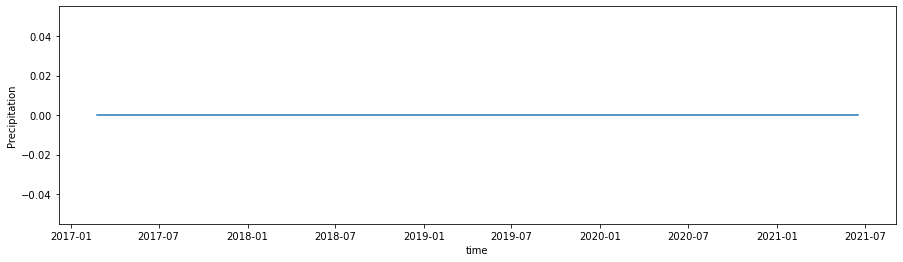

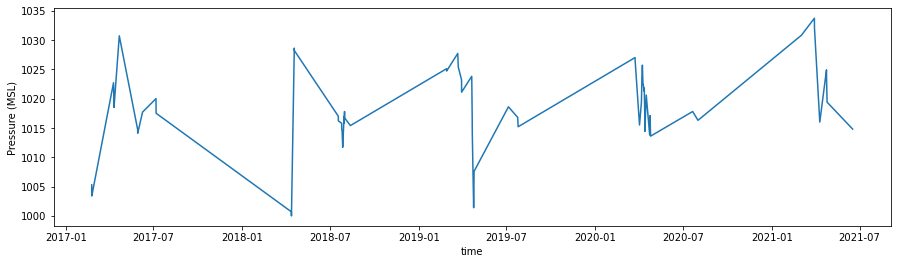

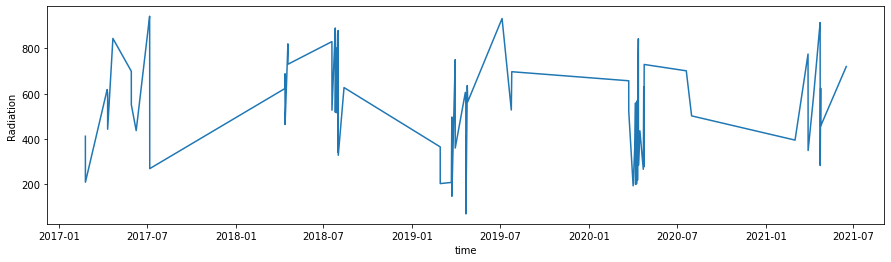

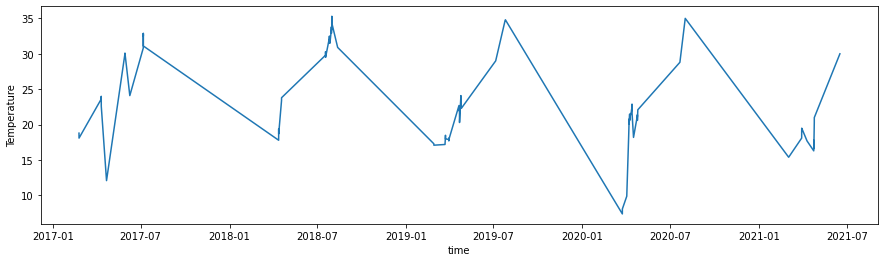

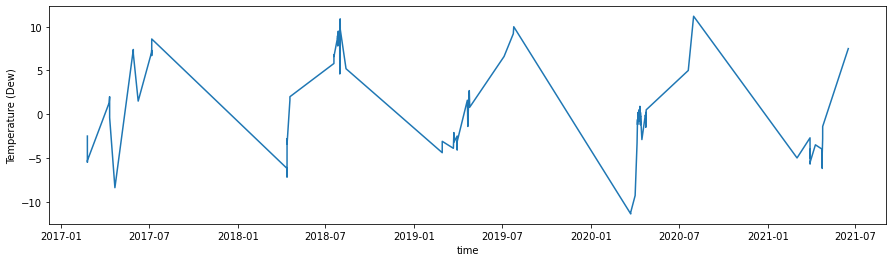

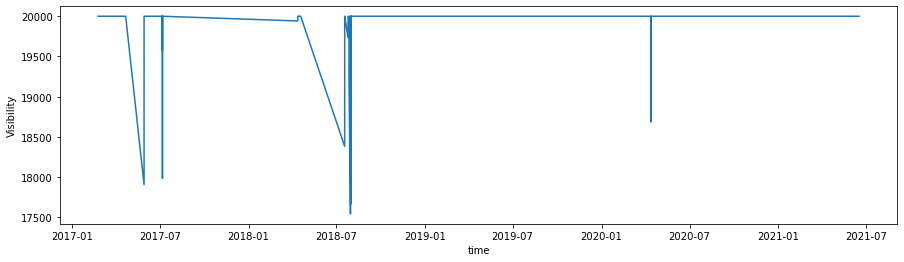

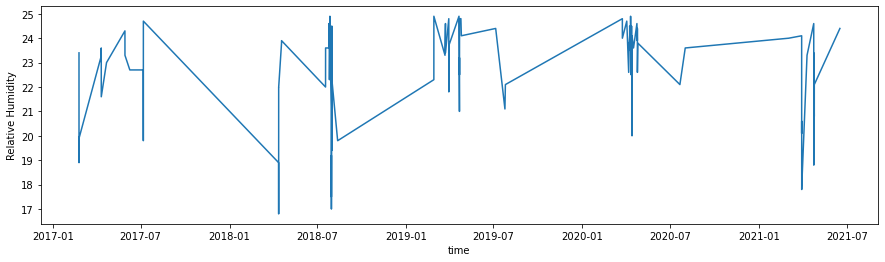

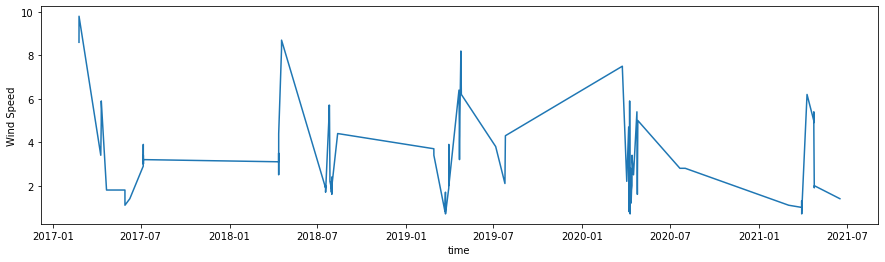

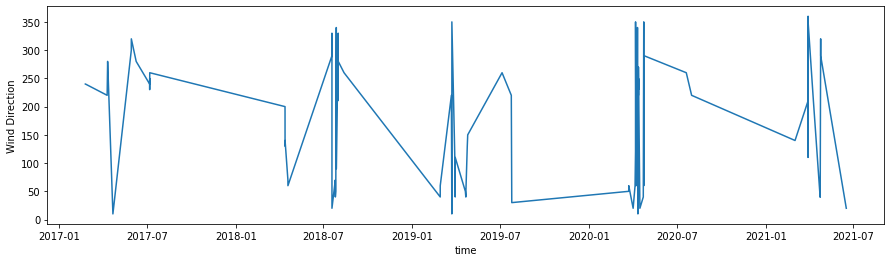

In [14]:
dfzr=dfz[dfz["Relative Humidity"]<25]

for i in dfzr.columns:
    
    plt.figure(figsize=(15,4))
    sns.lineplot(data=dfzr, x=dfzr.index, y=i);

### Plot the variables by month

In [8]:
dft = dfz.copy()
dft['month'] = dft.index.month 
dft['hour'] = dft.index.hour 
dft.head()

,Precipitation,Pressure (MSL),Radiation,Temperature,Temperature (Dew),Visibility,Relative Humidity,Wind Speed,Wind Direction,month,hour
time,,,,,,,,,,,
2017-01-01 00:00:00,0.0,1028.6,3,-3.5,-4.1,1337.166667,95.3,2.3,230.0,1,0
2017-01-01 01:00:00,0.0,1028.0,3,-3.6,-4.5,1814.333333,93.8,2.1,220.0,1,1
2017-01-01 02:00:00,0.0,1027.4,3,-3.5,-4.5,2683.833333,92.9,2.8,220.0,1,2
2017-01-01 03:00:00,0.0,1026.7,3,-3.5,-4.4,2922.333333,93.8,2.1,200.0,1,3
2017-01-01 04:00:00,0.0,1026.1,3,-3.6,-4.4,3467.166667,94.5,1.8,220.0,1,4


- Thanks to plots below, meteorological characteristics of location can be analysed.

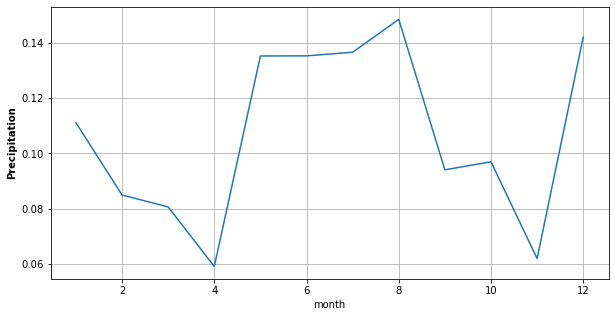

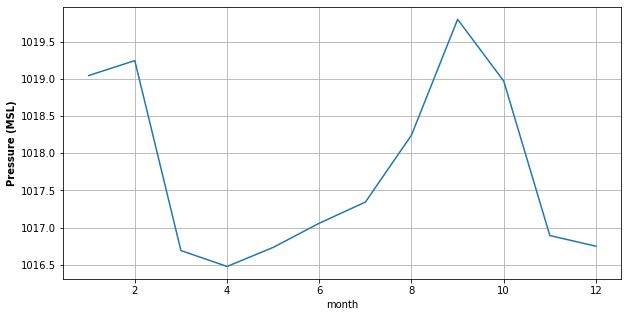

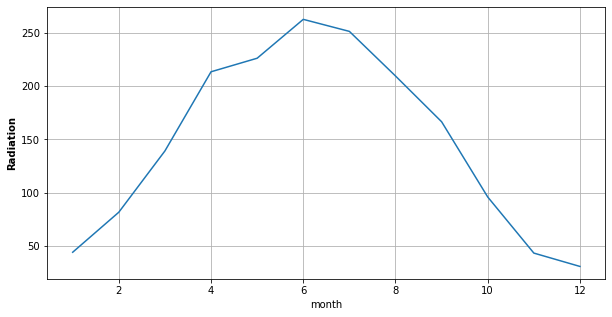

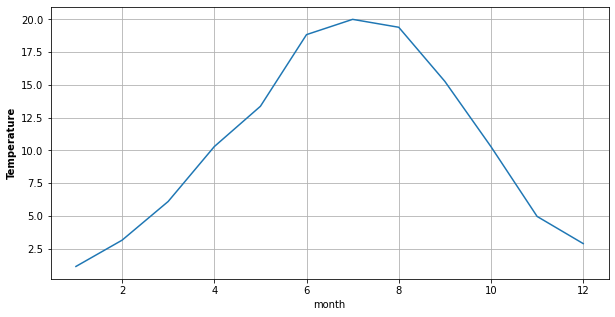

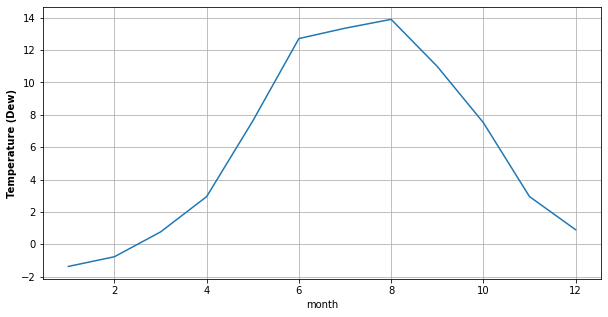

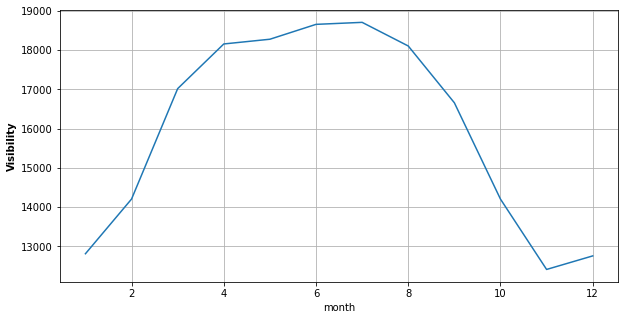

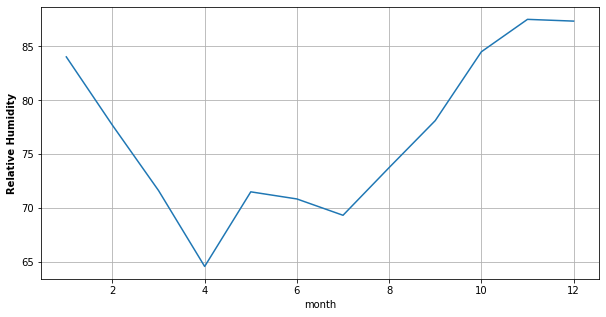

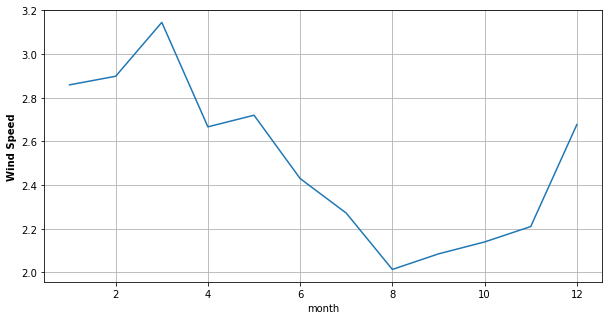

In [9]:
for i in dft.drop(["month","hour","Wind Direction"], axis=1).columns:
    
    month = dft.groupby("month")[i].mean()
    plt.figure(figsize=(10,5))
    plt.ylabel(i, fontweight="bold")
    plt.grid()
    sns.lineplot(month.index, month.values);

In [30]:
pip install windrose

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


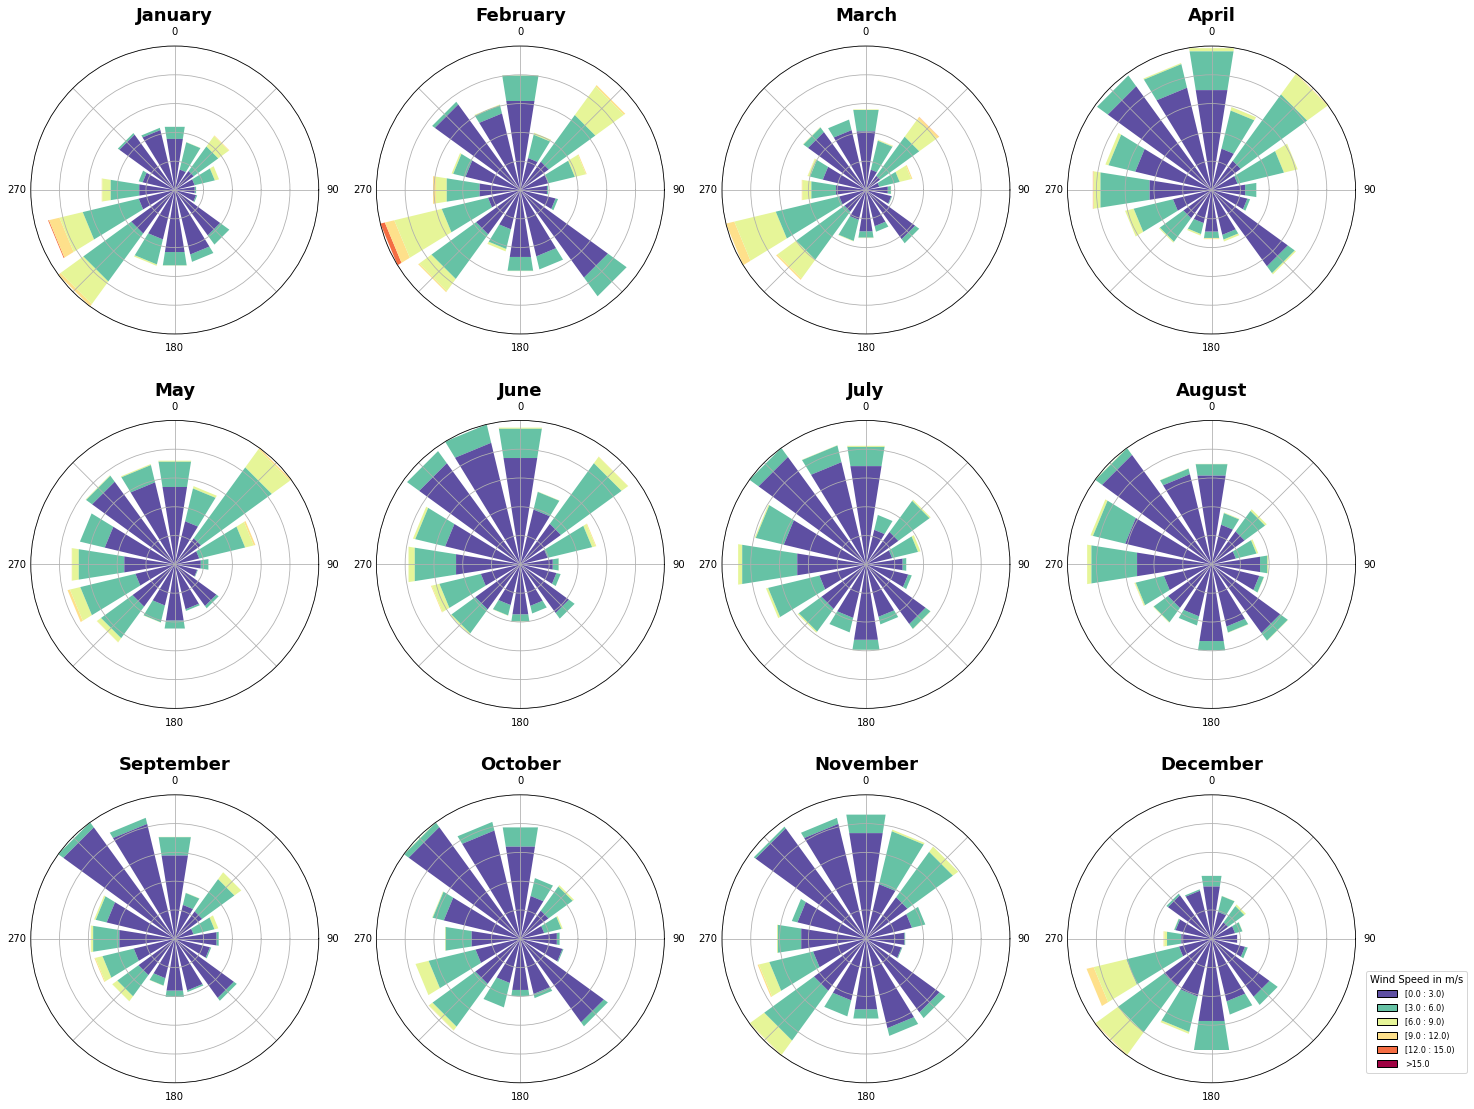

In [14]:
from windrose import WindroseAxes

listt={1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June",
      7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"}

y=[2.6,2.6,2.6,2.6,1.3,1.3,1.3,1.3,0,0,0,0]
x=[0,0.8,1.6,2.4,0,0.8,1.6,2.4,0,0.8,1.6,2.4,0,0.8,1.6,2.4]

fig = plt.figure()

for m in np.arange(1,13):
    
    dftt = dft[dft["month"]==m]

    ax = fig.add_axes([x[m-1],y[m-1],1,1], projection='windrose')
    ax.bar(dftt["Wind Direction"], dftt['Wind Speed'], normed=True, opening=0.8, 
           bins=np.arange(0,16,3), edgecolor='None', lw=2, cmap=plt.get_cmap('Spectral_r'))

    ax.set_xticklabels(['90', '', '0', '',  '270', '', '180', ''])
    ax.set_yticklabels("")
    sns.set_style()
    plt.title(listt[m], fontsize=18, fontweight="bold")
    if m==12:
        ax.set_legend(title="Wind Speed in m/s", bbox_to_anchor=(1,0,2,10), borderaxespad=1.)

fig.savefig(opath+"monthly_wind_ZRH.png", facecolor="white", bbox_inches = 'tight', dpi=250)
plt.tight_layout()

### Plot the variables by hours

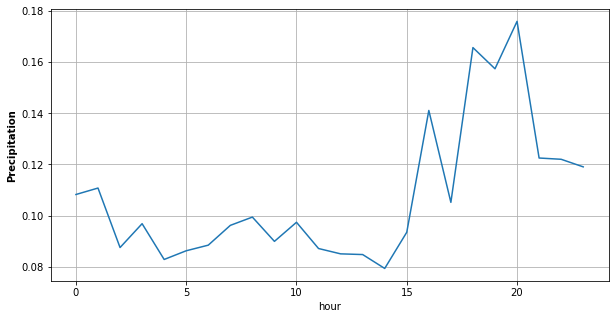

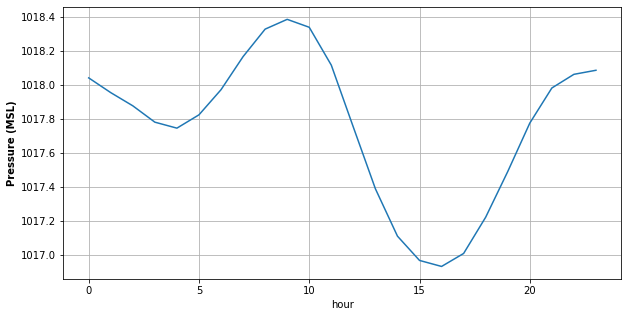

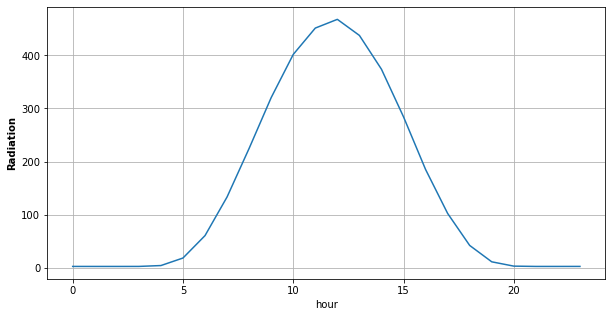

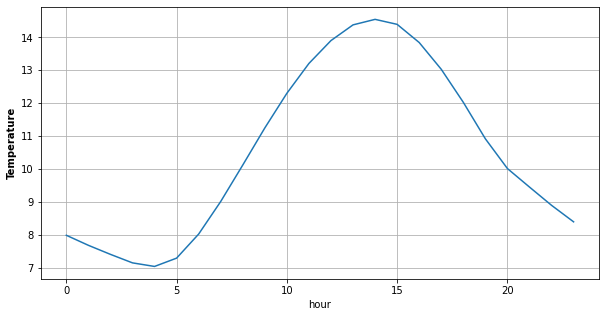

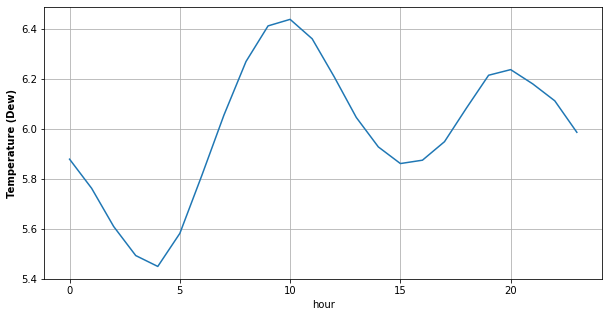

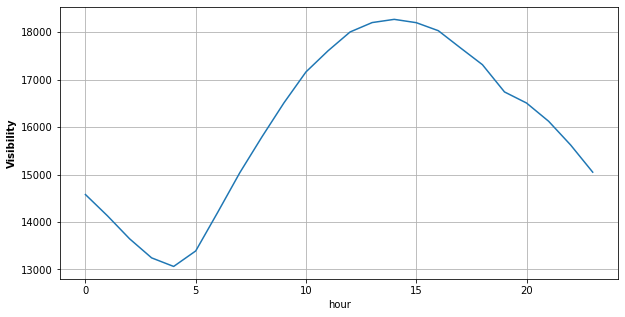

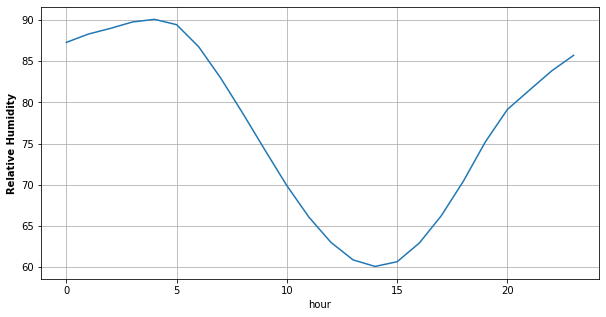

In [15]:
for i in dft.drop(["month","hour","Wind Speed","Wind Direction"], axis=1).columns:
    
    month = dft.groupby("hour")[i].mean()
    plt.figure(figsize=(10,5))
    plt.ylabel(i, fontweight="bold")
    plt.grid()
    sns.lineplot(month.index, month.values);

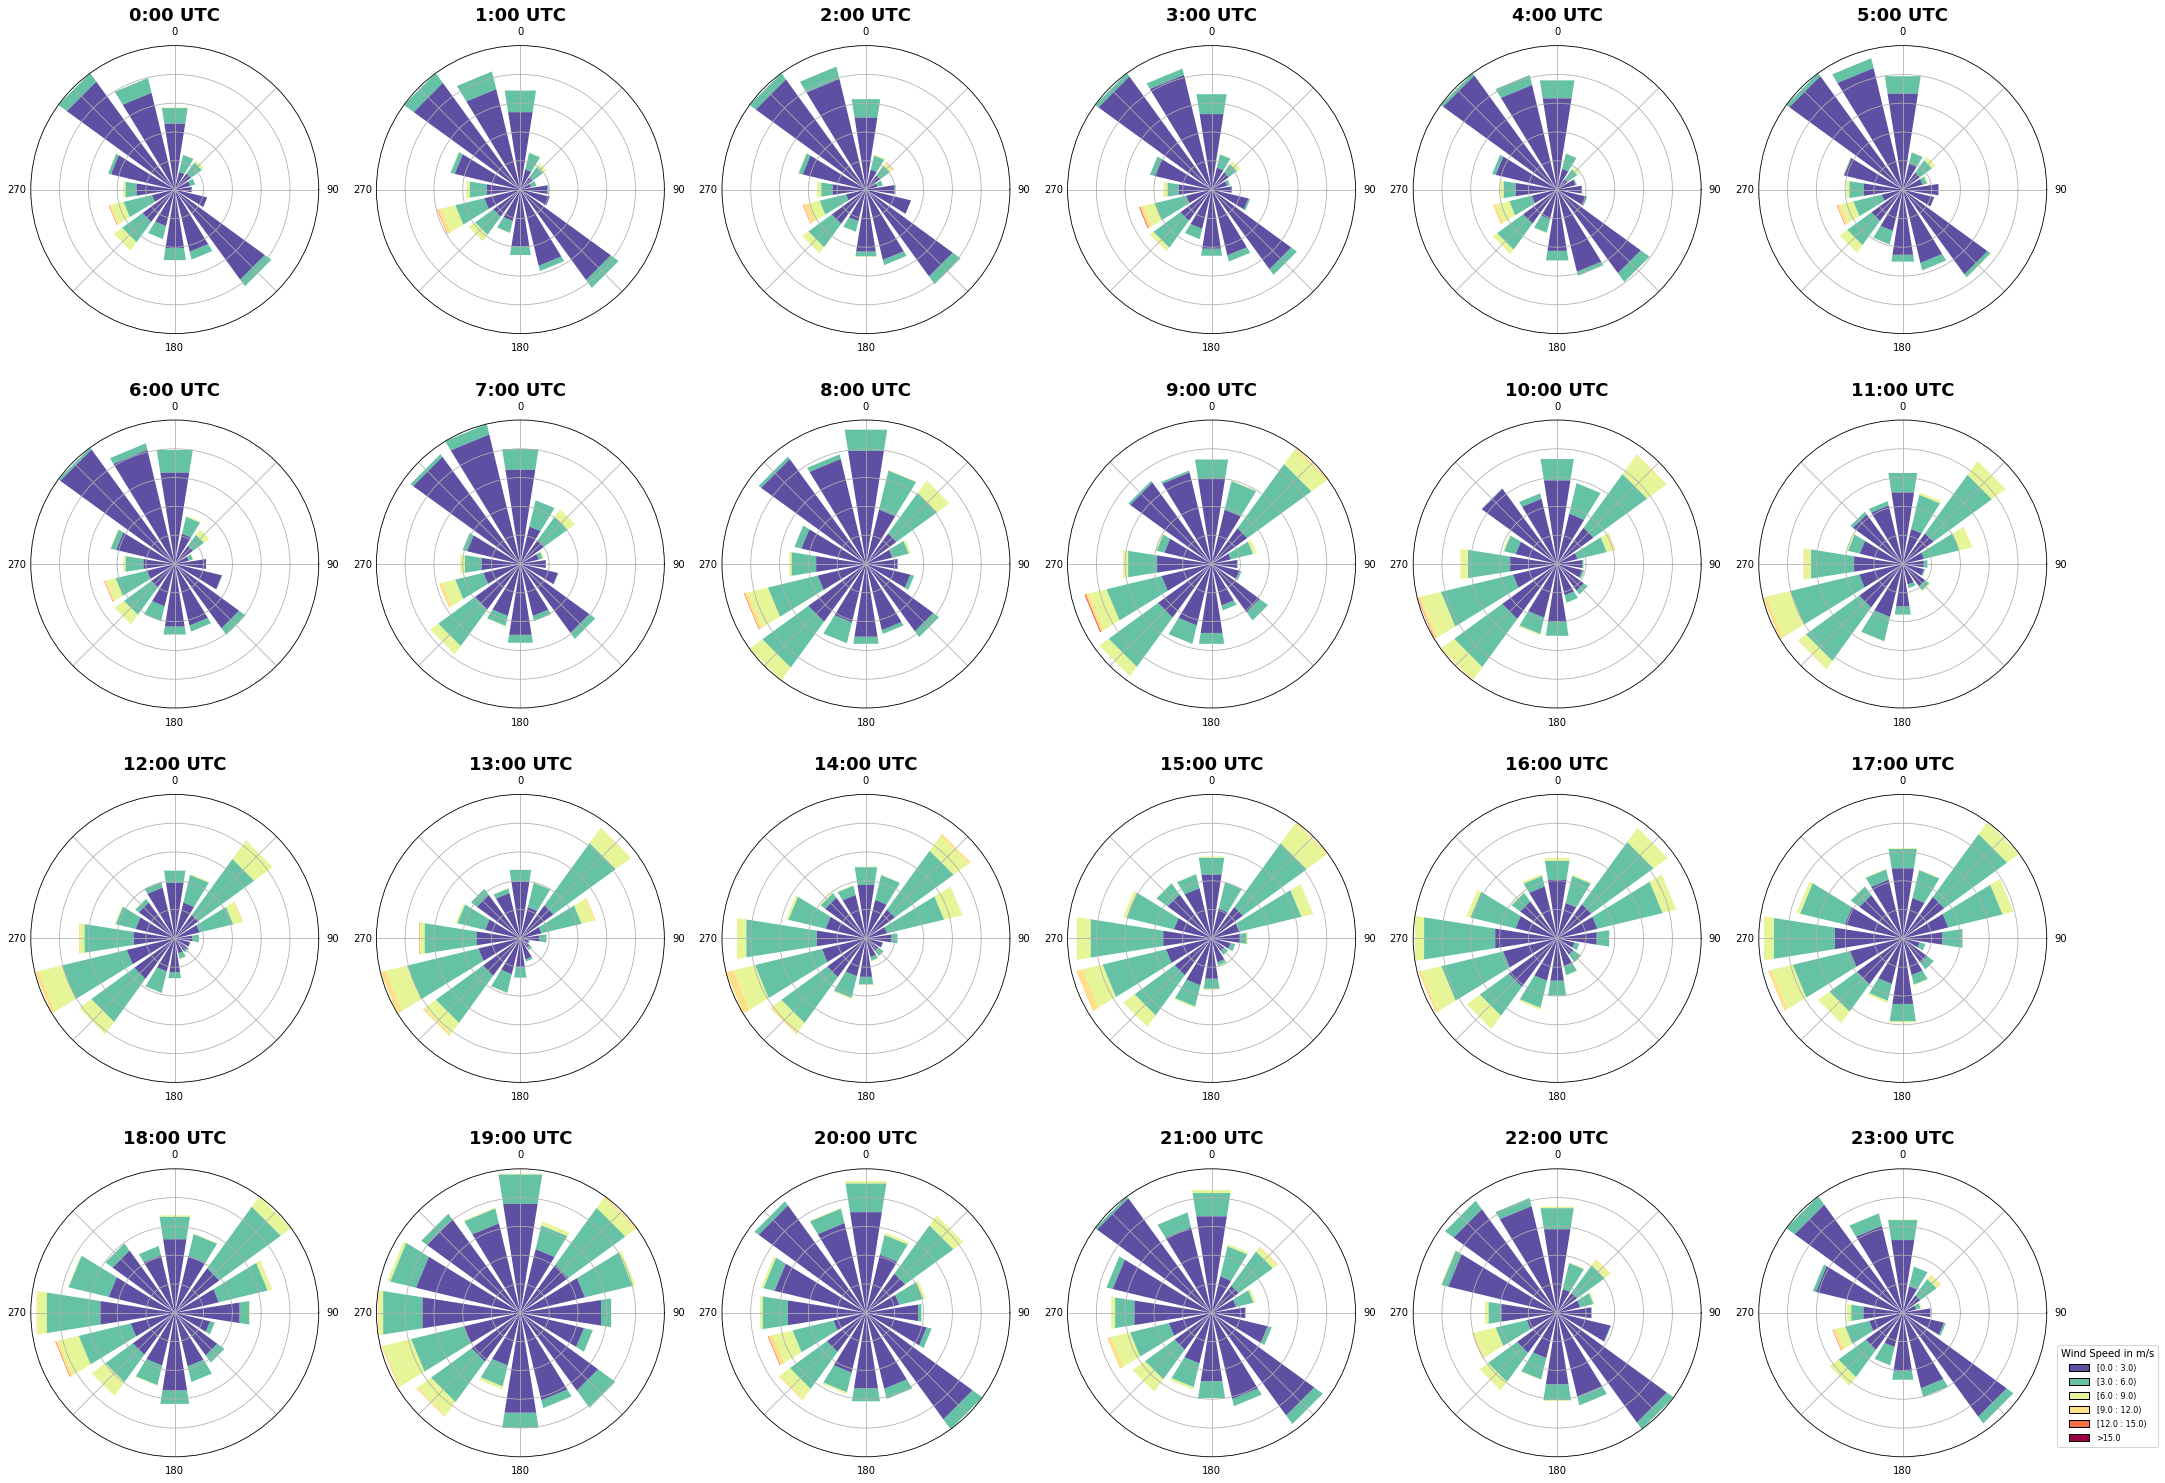

In [16]:
y=[3.9,3.9,3.9,3.9,3.9,3.9,2.6,2.6,2.6,2.6,2.6,2.6,1.3,1.3,1.3,1.3,1.3,1.3,0,0,0,0,0,0]
x=[0,0.8,1.6,2.4,3.2,4,0,0.8,1.6,2.4,3.2,4,0,0.8,1.6,2.4,3.2,4,
   0,0.8,1.6,2.4,3.2,4,0,0.8,1.6,2.4,3.2,4,0,0.8,1.6,2.4,3.2,4]

fig = plt.figure()

for h in np.arange(0,24):
    
    dftt = dft[dft["hour"]==h]

    ax = fig.add_axes([x[h],y[h],1,1], projection='windrose')
    ax.bar(dftt["Wind Direction"], dftt['Wind Speed'], normed=True, opening=0.8, 
           bins=np.arange(0,16,3), edgecolor='None', lw=2, cmap=plt.get_cmap('Spectral_r'))

    ax.set_xticklabels(['90', '', '0', '',  '270', '', '180', ''])
    ax.set_yticklabels("")
    sns.set_style()
    plt.title(str(h)+":00 UTC", fontsize=18, fontweight="bold")
    if h==23:
        ax.set_legend(title="Wind Speed in m/s", bbox_to_anchor=(1,0,2,10), borderaxespad=1.)

fig.savefig(opath+"hourly_wind_Zurich.png", facecolor="white", bbox_inches = 'tight', dpi=250)
plt.tight_layout()

- According to correlation diagram below, it can be said that radiation is the meteorological parameter that mostly affect the temperature variable.

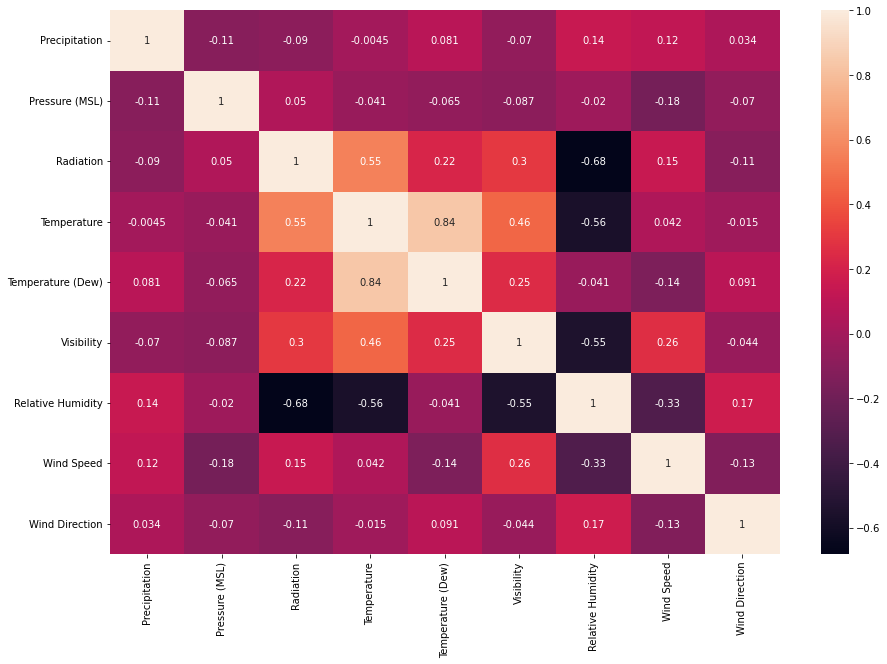

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(dfz.corr(), annot=True);

- Each variable was visualised separately, consequently it can be said that almost all variables have seasonality.

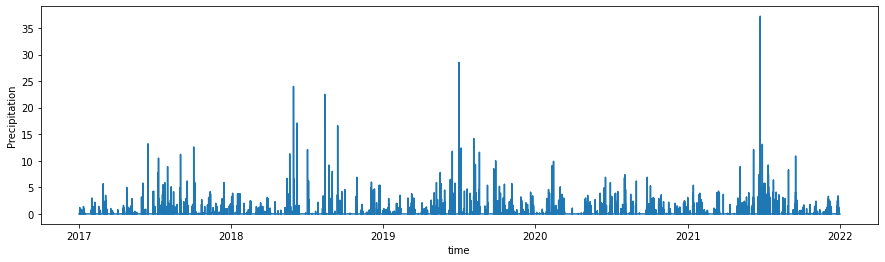

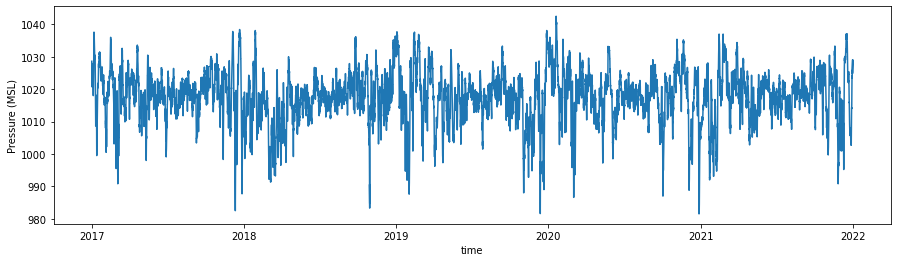

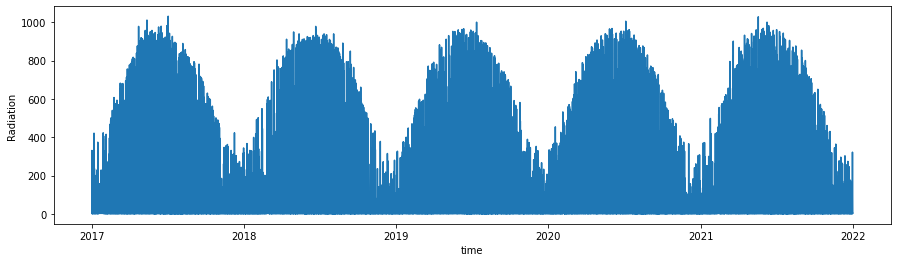

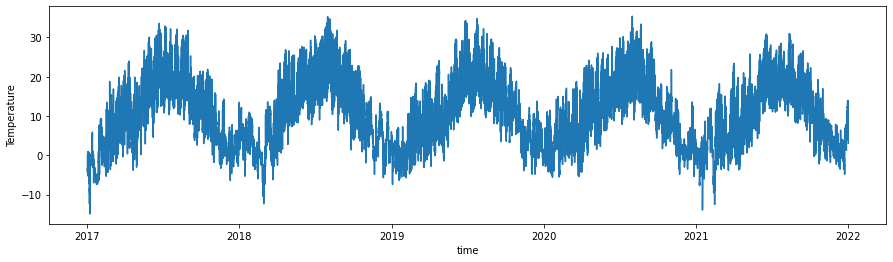

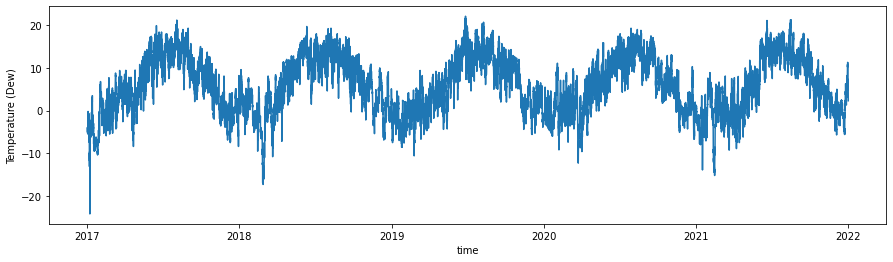

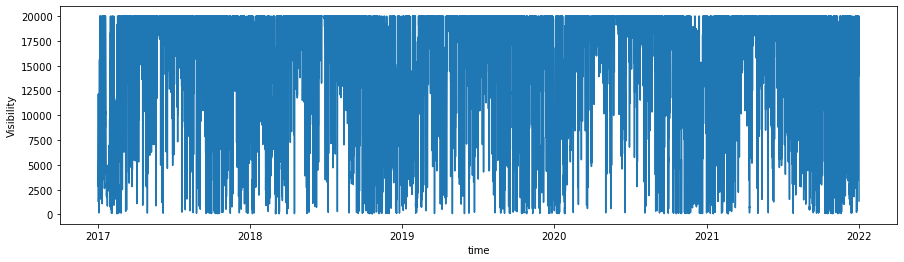

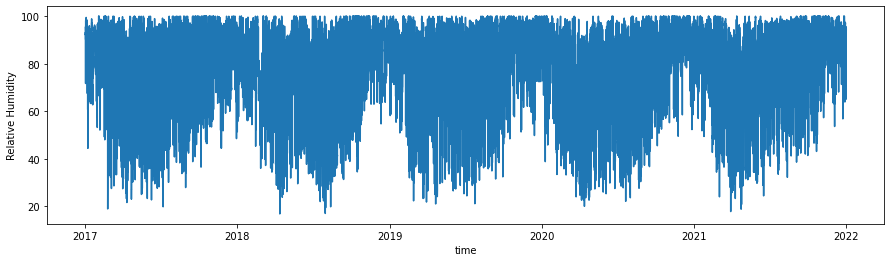

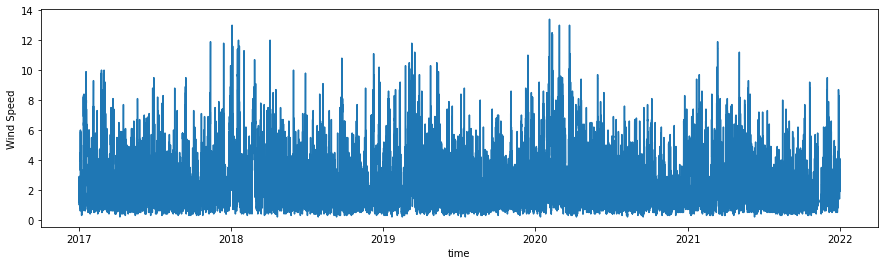

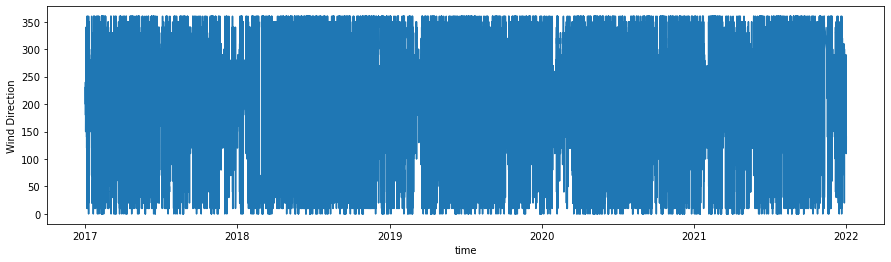

In [18]:
for i in dfz.columns:
    
    plt.figure(figsize=(15,4))
    sns.lineplot(data=dfz, x=dfz.index, y=i);

### Train | Test Split

- Period was decided as daily. Each period would be completed for every 24 rows (Because we have hourly dataset). Hence, I am going to set a sequence 24 length.

In [448]:
df = dfz.copy()
df

,Precipitation,Pressure (MSL),Radiation,Temperature,Temperature (Dew),Visibility,Relative Humidity,Wind Speed,Wind Direction
time,,,,,,,,,
2017-01-01 00:00:00,0.0,1028.6,3,-3.5,-4.1,1337.166667,95.3,2.3,230.0
2017-01-01 01:00:00,0.0,1028.0,3,-3.6,-4.5,1814.333333,93.8,2.1,220.0
2017-01-01 02:00:00,0.0,1027.4,3,-3.5,-4.5,2683.833333,92.9,2.8,220.0
2017-01-01 03:00:00,0.0,1026.7,3,-3.5,-4.4,2922.333333,93.8,2.1,200.0
2017-01-01 04:00:00,0.0,1026.1,3,-3.6,-4.4,3467.166667,94.5,1.8,220.0
...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,0.0,1027.6,3,7.0,5.1,17504.166667,87.8,2.9,140.0
2021-12-31 20:00:00,0.0,1027.9,2,6.3,4.6,10692.500000,88.6,2.2,130.0
2021-12-31 21:00:00,0.0,1028.1,2,4.9,4.2,5795.833333,95.5,2.2,110.0


In [449]:
df = df.reindex(columns=["Temperature","Precipitation","Pressure (MSL)","Radiation","Temperature (Dew)",
                         "Visibility","Relative Humidity","Wind Speed","Wind Direction"])
df

,Temperature,Precipitation,Pressure (MSL),Radiation,Temperature (Dew),Visibility,Relative Humidity,Wind Speed,Wind Direction
time,,,,,,,,,
2017-01-01 00:00:00,-3.5,0.0,1028.6,3,-4.1,1337.166667,95.3,2.3,230.0
2017-01-01 01:00:00,-3.6,0.0,1028.0,3,-4.5,1814.333333,93.8,2.1,220.0
2017-01-01 02:00:00,-3.5,0.0,1027.4,3,-4.5,2683.833333,92.9,2.8,220.0
2017-01-01 03:00:00,-3.5,0.0,1026.7,3,-4.4,2922.333333,93.8,2.1,200.0
2017-01-01 04:00:00,-3.6,0.0,1026.1,3,-4.4,3467.166667,94.5,1.8,220.0
...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,7.0,0.0,1027.6,3,5.1,17504.166667,87.8,2.9,140.0
2021-12-31 20:00:00,6.3,0.0,1027.9,2,4.6,10692.500000,88.6,2.2,130.0
2021-12-31 21:00:00,4.9,0.0,1028.1,2,4.2,5795.833333,95.5,2.2,110.0


In [450]:
df.isnull().sum()

Temperature            0
Precipitation          1
Pressure (MSL)         0
Radiation              0
Temperature (Dew)      0
Visibility             4
Relative Humidity      0
Wind Speed           160
Wind Direction       160
dtype: int64

- Missing values removed!

In [451]:
df.dropna(how="any", inplace=True)
df.isnull().sum()

Temperature          0
Precipitation        0
Pressure (MSL)       0
Radiation            0
Temperature (Dew)    0
Visibility           0
Relative Humidity    0
Wind Speed           0
Wind Direction       0
dtype: int64

In [452]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,43659.0,10.531879,8.197142,-14.9,4.000000,10.1,16.5,35.4
Precipitation,43659.0,0.107895,0.600064,0.0,0.000000,0.0,0.0,37.2
Pressure (MSL),43659.0,1017.750617,8.026946,981.5,1013.800000,1018.2,1022.5,1042.5
Radiation,43659.0,147.739756,235.834536,0.0,2.000000,8.0,201.0,1031.0
Temperature (Dew),43659.0,6.000710,6.513435,-24.2,0.900000,5.9,11.5,22.1
Visibility,43659.0,16040.892143,6167.547007,56.0,13245.416667,20000.0,20000.0,20000.0
Relative Humidity,43659.0,76.689894,18.516673,16.8,64.400000,81.7,91.9,100.0
Wind Speed,43659.0,2.509329,1.718453,0.2,1.200000,2.0,3.3,13.4
Wind Direction,43659.0,201.174786,105.711190,0.0,120.000000,220.0,300.0,360.0


In [453]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43659 entries, 2017-01-01 00:00:00 to 2021-12-31 23:00:00
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        43659 non-null  float64
 1   Precipitation      43659 non-null  float64
 2   Pressure (MSL)     43659 non-null  float64
 3   Radiation          43659 non-null  int64  
 4   Temperature (Dew)  43659 non-null  float64
 5   Visibility         43659 non-null  float64
 6   Relative Humidity  43659 non-null  float64
 7   Wind Speed         43659 non-null  float64
 8   Wind Direction     43659 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 3.3 MB


- Let's split the dataset into train and test.
- I am going to train the model with 4 years data from 2017 to 2020. Then, I will predict whatever time period I want!

In [454]:
#train = df.iloc[:-test_ind]
#test = df.iloc[-test_ind:]

# Define the meteorological parameter I want to predict
par="Temperature"

# Easy naming part
test_days = 30 
month = "November"

#############################
# Don't change #

if test_days == 1:
    d="day"
else:
    d="days"

#############################
   
# Train and Tes Split
train = df[df.index < "2021-01-01"]
test = df[(df.index >= "2021-10-31")&(df.index < "2021-12-1")] 
#Watch out! 24-hours from test dataset belongs to model itself. Please consider that when adjusting forecast time!

train.shape, test.shape

((35059, 9), (584, 9))

**Note:** Due to missing values, both train and test dataset might have missing rows!

## Scaling

In [455]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

**Robust Scaling**

It is common to scale data prior to fitting a machine learning model.

This is because data often consists of many different input variables or features (columns) and each may have a different range of values or units of measure, such as hPa, m/s, mm, C, etc.

If there are input variables that have very large values relative to the other input variables, these large values can dominate or skew some machine learning algorithms. The result is that the algorithms pay most of their attention to the large values and ignore the variables with smaller values.

- In this study, our target feature is temperature, we will forecast it. Since we will only apply the inverse_transform operation to the target variable, we need to scale the target column separately. Because I am going to apply inverse_transform to a single feature in this model, it would give an error, if we apply scale operation collectively.

In [456]:
df.columns

Index(['Temperature', 'Precipitation', 'Pressure (MSL)', 'Radiation',
       'Temperature (Dew)', 'Visibility', 'Relative Humidity', 'Wind Speed',
       'Wind Direction'],
      dtype='object')

- We have included the columns other than the target label in a list (f columns).

- I defined RobustScaler for two separate variables. We will use f_transformer objects for fetaures and target_transformer objects for target label. The goal is to scale features and target separately.

- **train.loc[:,f_columns] :** Taking f columns of train data and applied fit_transform process.

- **train['temp'] :** Taking the only temperature column and applied fit_transform process.

- **test.loc[:,f_columns] :** Transform process only to test part of features.

- **test['temp'] :** Transform process only to test part of target.

In [457]:
f_columns = df.drop(par, axis=1).columns     # Except variable
#f_columns = dft.columns[1:]

f_transformer = RobustScaler()
target_transformer = RobustScaler()

train.loc[:, f_columns] = f_transformer.fit_transform(train[f_columns])
train[par] = target_transformer.fit_transform(train[[par]])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns])
test[par] = target_transformer.transform(test[[par]])

### Function for creating timesteps

If the sequence length is 24, we will take all the data of 24 lines and give them to the model, and accordingly we will ask them to predict the target variable of the 25th line only. Here again, all features will be trained (including target), as a result, only target variable will be estimated. The target variable will be estimated one after the other until the end by making one shift.

- We created a function to set up this structure. For this function; I have defined the X and y (X_train, y_train) of the data that we will process, and our number of steps (time_steps).
- X_train is all data, but y_train is only target column.
- That's why we defined two different empty lists as Xs and ys. Values from X_train will go to Xs and values from y_train will go to ys.
- len(X) - time_steps: We set the length excluding the time_steps in the last part of the data. It will not be able to process in the last time_steps anyway. The for loop will start from 0 and go up to whatever length it is.
- v = X.iloc[i:(i+time_steps)].values: Let i = 0. In each loop, take the 0 to 0+time_steps (0+24) part of the train data we have given, that is, the values of the first 24 rows (returned from DataFrame to array after taking the values). Each time the number of i enters the for loop, the index will increase by 1 and new values will be generated.
- Xs.append(v): Put all the values you found above into the Xs list.
- ys.append(y.iloc[i+time_steps]): In y we will define the target column. Likewise, (i+time steps) values will be calculated and added to the ys list.

**Note: Normally, in ML models, training is done with columns other than the target column and the target column is estimated at the end. However, in DL, the values in the target column are also included in the training and the target column is estimated again.**

In [458]:
# X : all features
# y : only target (will be predicted)

def create_dataset(X, y, time_steps=1):
    """ Create data sequence
    
    Arguments:
        * X: time-series data
        * y: target value
        * time_steps: Used to create input sequence of timesteps
    
    Returns:
        * input_sequence: Numpy array of sequences of time-series data
        * output: Numpy array of output i.e. next value for respective sequence
    
    """
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values  # got 24 , slip 1 
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps]) # take 24th index
    return np.array(Xs), np.array(ys)

We created X_train and y_train using create_dataset function that we generated above.

We defined x_train=train data, y_train=train.target column. Likewise, we defined X_test=test data, y_test=test.target column. We also defined time_steps as 24. All 24 rows of data will be trained, eventually the 25th value in the target column will be estimated and this process will continue until the end by scrolling down one by one.

In [459]:
time_steps = 24

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train[par], time_steps)
X_test, y_test = create_dataset(test, test[par], time_steps)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(35035, 24, 9) (35035,)
(560, 24, 9) (560,)


### Model building with LSTM method (Long Short-Term Memory)

Recurrent Neural Networks RNN are a type of artifcial neural network designed to recognize patterns in sequences of data, such as text, genomes, handwriting, the spoken word, numerical times series data.

Recurrent Neural Networks use backpropagation algorithm for training. Because of their internal memory, RNN’s are able to remember important things about the input they received, which enables them to be very precise in predicting what’s coming next.

RNNs could be stacked up to deeper versions, which contain more than 1 layers of RNN. Because RNNs are especially computationally expensive to train, normally a deep RNN model contains no more than 3 layers of LSTM.

Train a bidirectional long short term memory (LSTM) recurrent neural network (RNN) with this data, making use of the self-loop and forget gate of LSTM.

**LSTM sequential learning model was chosen because of its ability to process sequential data and memorize data of past time steps.**

LSTM is a different type of gated RNN which is capable of learning long-term dependencies LSTM is not affected by vanishing gradient or exploding gradient problem. Using Bidirectional LSTMs, we feed the learning algorithm with the original data once from beginning to the end and once from end to beginning.

**Birectional LSTM:** It is an extension of traditional LSTM that can improve model performance on sequence classification problems.

In problems where all timesteps of the input sequence are available, Bidirectional LSTMs train two instead of one LSTMs on the input sequence. The first on the input sequence as-is and the second on a reversed copy of the input sequence. This can provide additional context to the network and result in faster and even fuller learning on the problem.

**Create, Compile and Fit Bidirectional LSTM Model**
- Create a Sequential Model,
- Add Bidirectional layers,
- Apply Regularization (Drop Out),
- Compile the model.

**Note:** Define the optimizer as the efficient stochastic gradient descent algorithm **adam**. This is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems. The results of the Adam optimizer are generally better than every other optimization algorithms, have faster computation time, and require fewer parameters for tuning. Because of all that, Adam is recommended as the default optimizer for most of the applications.

In this case, use **mean squared error** as the loss argument. This loss is for a regression problems and is defined in Keras as mean_squared_error. Also use defined in Keras as **accuracy** as the metrics.

In [460]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [461]:
X_train.shape

(35035, 24, 9)

**units:** 
- Basically, the unit means the dimension of the inner cells in LSTM. Most LSTM/RNN diagrams just show the hidden cells but never the units of those cells. Hence, the confusion. 
- The layer will contain multiple parallel LSTM units, structurally identical but each eventually "learning to remember" some different thing. Each hidden layer has hidden cells, as many as the number of time steps. And further, each hidden cell is made up of multiple hidden units.
- The number of units defines the dimension of hidden states (or outputs) and the number of params in the LSTM layer. Personally, I think that more units (greater dimension of hidden states) will help the network to remember more complex patterns. But it may cause overfitting.

**input_shape:**
-  In a Keras layer, the input shape is generally the shape of the input data provided to the Keras model while training. The model cannot know the shape of the training data.  
- So, you always have to give a three-dimensional array as an input to your LSTM network. Where the first dimension represents the batch size, the second dimension represents the time-steps and the third dimension represents the number of units in one input sequence. 
- The input of LSTM layer has a shape of (num_timesteps, num_features) , therefore: If each input sample has 24 timesteps, where each timestep consists of 8 feature value, then the input shape would be (24, 8)

**Dropout:**
- This technique is applied in the training phase to reduce overfitting effects.
- For example, if the hidden layers have 1000 neurons (nodes) and a dropout is applied with drop probability = 0.2, then 200 neurons would be randomly dropped in every iteration (batch).
- Meaning that there would be less neurons working in the forward process, thus the overall structure of neural network is simplified.Meanwhile, the trained model would be more robust, since the model no longer can rely on any specific neurons anymore (as they could be muted in the process), all other neurons would need to learn in the training.

**Dense:** A dense layer is the most frequently used layer which is basically a layer where each neuron receives input from all neurons in the previous layer — thus, “densely connected”. Dense layers improve overall accuracy and 5–10 units or nodes per layer is a good base.

**EarlyStopping:** This method allows us to specify a large number of training epochs and stop training once the model performance stops improving on a hold out validation dataset. Early stopping is basically stopping the training once you reached the minimum of your losses or errors.

**restore_best_weights = True :**

- If Early Stop gives a bad score 5 times in a row, it will stop. So the 5th from the last value is actually the place where education should stop. This parameter will also take the place where the best weight values are in the last 5'.
- Namely, If I don't say take the best value, it takes the last value (sometimes it can be the lower value).

**return_sequences=True:** LSTM can return 4 different sets of results/states according to the given parameters. All Hidden States (Hidden State of ALL the time steps)

In [462]:
X_train.shape

(35035, 24, 9)

In [463]:
y_train.shape

(35035,)

In [464]:
#from keras.layers import TimeDistributed
#from keras.layers import RepeatVector

#model = Sequential() 

#model.add(LSTM(units=200, input_shape=(X_train.shape[1], X_train.shape[2])))
#model.add(RepeatVector(X_train.shape[1]))
#model.add(LSTM(200, return_sequences=True))

#model.add(Dropout(rate=0.3))
#model.add(TimeDistributed(Dense(1)))
#model.compile(optimizer='adam', loss='mse')

**Note:** Above cell is normally used to prevent "delayed prediction" problem. However, I tried to run it but got dimension error. Because the number of features is 8 and target is one. Normally, they have to be in same dimensions.

In [465]:
model = Sequential() 

# input_shape=(time_steps, n_features)
# units=128 -> number of neurons. It represents how many hidden states there are for this layer and
# also represents the output dimension

model.add(Bidirectional(LSTM(units=350, input_shape=(X_train.shape[1], X_train.shape[2]))))
#model.add(Dropout(rate=0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse')

In [466]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

**epoch:** One forward pass and one backward pass of all the training examples. Or, one Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE.

**batch size:** It is the number of training samples used in one iteration. The higher the batch size, the more memory space you'll need. The lower batch size, the higher accuracy.

- We set up a batch_size equal to 24. The algorithm takes the first 24 samples (from 1st to 24th) from the training dataset and trains the network. Next, it takes the second 24 samples (from 25th to 48th) and trains the network again.

**validation_split:** Keras can separate a portion of your training data into a validation dataset and evaluate the performance of your model on that validation dataset in each epoch. You can do this by setting the validation_split argument on the fit() function to a percentage of the size of your training dataset. For example, a reasonable value might be 0.2 or 0.33 for 20% or 33% of your training data held back for validation.

**shuffle:** Have you played the game of cards ? At the end of each round of play, all the cards are collected, shuffled & followed by a cut to ensure that cards are distributed randomly & stack of cards each player gets is only due to chance. In machine learning(ML) , we are often presented with a dataset that will be further split into training, testing & validation datasets. It is very important that dataset is shuffled well to avoid any element of bias/patterns in the split datasets before training the ML model.

**Note:** shuffle = False (Default=True): This means that data is scrambled every epoch. Since our data is already in packages of 24, the hashing process will be done in packages

In [467]:
model.fit(X_train, y_train, 
          epochs=50,
          batch_size=24, 
          validation_split=0.3,
          shuffle=False,
          callbacks=[early_stop])

Epoch 1/50
1022/1022 [==============================] - 26s 24ms/step - loss: 0.0247 - val_loss: 0.0072
Epoch 2/50
1022/1022 [==============================] - 23s 23ms/step - loss: 0.0076 - val_loss: 0.0055
Epoch 3/50
1022/1022 [==============================] - 24s 23ms/step - loss: 0.0066 - val_loss: 0.0052
Epoch 4/50
1022/1022 [==============================] - 24s 24ms/step - loss: 0.0061 - val_loss: 0.0052
Epoch 5/50
1022/1022 [==============================] - 24s 24ms/step - loss: 0.0059 - val_loss: 0.0052
Epoch 6/50
1022/1022 [==============================] - 24s 23ms/step - loss: 0.0057 - val_loss: 0.0052
Epoch 7/50
1022/1022 [==============================] - 23s 23ms/step - loss: 0.0056 - val_loss: 0.0052
Epoch 8/50
1022/1022 [==============================] - 23s 23ms/step - loss: 0.0054 - val_loss: 0.0052
Epoch 9/50
1022/1022 [==============================] - 24s 23ms/step - loss: 0.0053 - val_loss: 0.0052
Epoch 10/50
1022/1022 [==============================] - 23s 23m

In [468]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_17 (Bidirecti  (None, 700)              1008000   
 onal)                                                           
                                                                 
 dense_14 (Dense)            (None, 1)                 701       
                                                                 
Total params: 1,008,701
Trainable params: 1,008,701
Non-trainable params: 0
_________________________________________________________________


In [469]:
len(model.layers)

2

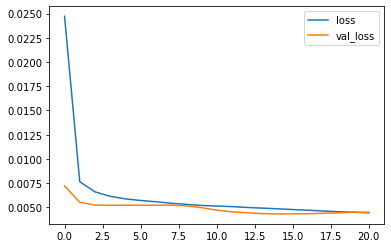

In [470]:
losses = pd.DataFrame(model.history.history)
losses.plot();
plt.savefig(opath+"ZRH_"+str(par)+"_"+str(month)+"_"+str(test_days)+' days_val_loss.png',
            facecolor='white')

### Evaluation on test data

In [471]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [472]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

### First way: after each prediction, actual value will be used for next prediction

- "After each prediction, use the actual value for the next prediction." I was using the prediction value that I found in the forecast process so far for the next forecast. In the first way I used here, a forward forecast was made and no prediction was built on the prediction. A prediction was made after 24 data, this estimate was not used in the next step, it was used by taking the actual value in the test data. In the studies, I can see notebooks solved by this method. But the correct way is to make prediction on prediction. I applied this method in the second way.

- In some cases, the first way also has usage fields. For example, the created model may want instant forecasts instead of long forecasts (like factory sensors). It may be requested that the device stop working instead of predicting what will happen after 1 minute or 3 minutes and causing a malfunction accordingly. This method can be used in such models.

In [473]:
y_pred = model.predict(X_test)

In [474]:
eval_metrics(y_test, y_pred)

r2_score: 0.94847662415822 
mae: 0.0353738378457858 
mse: 0.002433622737873706 
rmse: 0.04933176195792834


In [475]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
    
with open(opath+"hourly_ZRH_"+str(par)+"_"+str(month)+"_"+str(test_days)+" days_eval metrics.txt", "x") as f:
    f.write(f"r2_score: {score}, mae: {mae}, mse: {mse}, rmse: {rmse}")

### Inverse transformation and comparing

In [476]:
y_train.shape, y_test.shape

((35035,), (560,))

In [477]:
y_train.reshape(1,-1).shape

(1, 35035)

In [478]:
y_train_inv = target_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = target_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = target_transformer.inverse_transform(y_pred)

In [479]:
test_index = test.iloc[time_steps:].index         

pred_test = pd.concat([pd.DataFrame(y_test_inv.reshape(-1, 1)),
                       pd.DataFrame(y_pred_inv)], axis = 1)
pred_test.columns=['test','prediction']
pred_test.index = test_index
pred_test.to_csv(opath+"hourly_ZRH_"+str(par)+"_"+str(month)+"_"+str(test_days)+" days.csv")
pred_test

,test,prediction
time,,
2021-11-01 00:00:00,9.0,7.927975
2021-11-01 01:00:00,9.0,8.772276
2021-11-01 02:00:00,8.9,9.214742
2021-11-01 03:00:00,10.7,9.054314
2021-11-01 04:00:00,11.5,11.033852
...,...,...
2021-11-30 19:00:00,1.7,1.751081
2021-11-30 20:00:00,2.2,1.964621
2021-11-30 21:00:00,2.5,2.365284


**Note:** The flatten() function is used to get a copy of an given array collapsed into one dimension.

**Note:** The graphic below doesn't contain missing values. That's why it has no space among the values.

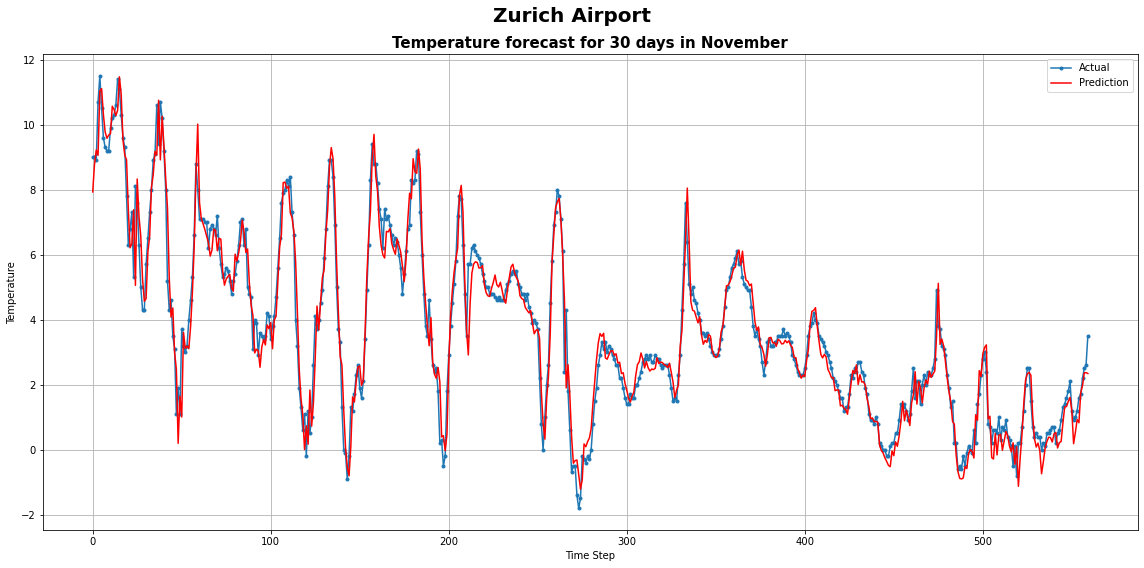

In [480]:
plt.figure(figsize=(16,8))
plt.plot(y_test_inv.flatten(), marker='.', label="Actual")
plt.plot(y_pred_inv.flatten(), 'r', label="Prediction")
plt.suptitle("Zurich Airport", fontsize=20, fontweight="bold")
plt.title(str(par)+" forecast for "+str(test_days)+" "+str(d)+" in "+str(month), fontsize=15, fontweight="bold")
plt.ylabel(str(par))
plt.xlabel('Time Step')
plt.legend()
plt.grid()
plt.savefig(opath+"_hourly_ZRH_"+str(par)+"_"+str(month)+"_"+str(test_days)+' days_timstep.png',
            facecolor='white', bbox_inches = 'tight')
plt.tight_layout()
plt.show();

**Note:** The straight lines in the plot below represent the missing values that belong to relevant dates.

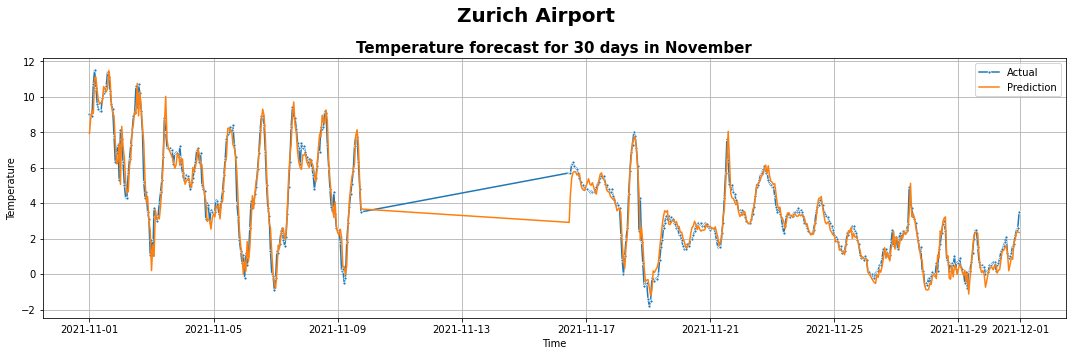

In [481]:
fig=plt.figure(figsize=(15,5))
plt.suptitle("Zurich Airport", fontsize=20, fontweight="bold")
sns.lineplot(x=pred_test.index, y=pred_test["test"], label="Actual", marker=".")#, linestyle='--')
sns.lineplot(x=pred_test.index, y=pred_test["prediction"], label="Prediction")
plt.title(str(par)+" forecast for "+str(test_days)+" "+str(d)+" in "+str(month), fontsize=15, fontweight="bold")
plt.ylabel(str(par))
plt.xlabel('Time')
plt.grid()
fig.savefig(opath+"hourly_ZRH_"+str(par)+"_"+str(month)+"_"+str(test_days)+' days.png',
            facecolor='white', bbox_inches = 'tight')
plt.tight_layout()
plt.show();

### Second way: after each prediction, output of prediction will be used for next prediction

In this method, unlike the previous one, I will process by putting predictions in the next forecast instead of actual values.

In [482]:
test

,Temperature,Precipitation,Pressure (MSL),Radiation,Temperature (Dew),Visibility,Relative Humidity,Wind Speed,Wind Direction
time,,,,,,,,,
2021-10-31 00:00:00,-0.176,0.0,-0.511628,-0.030303,0.153846,-2.361634,0.575000,-0.190476,-0.444444
2021-10-31 01:00:00,-0.176,0.0,-0.488372,-0.030303,0.144231,-2.420230,0.539286,-0.619048,-1.055556
2021-10-31 02:00:00,-0.152,0.1,-0.488372,-0.030303,0.173077,-2.478198,0.550000,-0.523810,0.777778
2021-10-31 03:00:00,-0.152,0.3,-0.534884,-0.030303,0.182692,-2.398422,0.560714,-0.095238,0.444444
2021-10-31 04:00:00,-0.184,0.0,-0.604651,-0.030303,0.153846,-2.782901,0.585714,-0.285714,0.722222
...,...,...,...,...,...,...,...,...,...
2021-11-30 19:00:00,-0.688,0.6,0.151163,-0.030303,-0.596154,-0.257879,0.239286,2.190476,0.111111
2021-11-30 20:00:00,-0.648,0.1,0.139535,-0.030303,-0.567308,0.000000,0.185714,2.428571,0.055556
2021-11-30 21:00:00,-0.624,0.0,0.127907,-0.030303,-0.548077,0.000000,0.164286,1.761905,0.000000


We took the first 24 lines of the test data, excluding the target label, and assigned it to a variable.

In [483]:
df2=test[time_steps:].drop(par, axis=1)
df2

,Precipitation,Pressure (MSL),Radiation,Temperature (Dew),Visibility,Relative Humidity,Wind Speed,Wind Direction
time,,,,,,,,
2021-11-01 00:00:00,0.0,-1.441860,-0.030303,0.211538,-1.916485,0.500000,0.047619,-0.444444
2021-11-01 01:00:00,0.0,-1.500000,-0.030303,0.221154,-1.416358,0.510714,-0.095238,-0.333333
2021-11-01 02:00:00,0.0,-1.546512,-0.030303,0.211538,-1.165040,0.514286,-0.190476,-0.333333
2021-11-01 03:00:00,0.0,-1.546512,-0.030303,0.278846,-0.089811,0.282143,-0.095238,-0.444444
2021-11-01 04:00:00,0.0,-1.500000,-0.030303,0.317308,0.000000,0.203571,1.000000,0.444444
...,...,...,...,...,...,...,...,...
2021-11-30 19:00:00,0.6,0.151163,-0.030303,-0.596154,-0.257879,0.239286,2.190476,0.111111
2021-11-30 20:00:00,0.1,0.139535,-0.030303,-0.567308,0.000000,0.185714,2.428571,0.055556
2021-11-30 21:00:00,0.0,0.127907,-0.030303,-0.548077,0.000000,0.164286,1.761905,0.000000


We took only the first 24 lines of the target label of the test data and assigned it to a variable for comparison.

In [484]:
act_scaled = np.array(test[par][time_steps:])
act_scaled.reshape((1,-1))[0]

array([-0.104, -0.104, -0.112,  0.032,  0.096,  0.016, -0.056, -0.08 ,
       -0.088, -0.088, -0.032, -0.008,  0.   ,  0.024,  0.088,  0.064,
        0.   , -0.056, -0.08 , -0.2  , -0.32 , -0.28 , -0.24 , -0.4  ,
       -0.176, -0.216, -0.32 , -0.424, -0.48 , -0.48 , -0.368, -0.304,
       -0.24 , -0.184, -0.112, -0.096,  0.024, -0.072,  0.032, -0.008,
       -0.088, -0.184, -0.408, -0.48 , -0.456, -0.544, -0.576, -0.736,
       -0.672, -0.736, -0.528, -0.568, -0.584, -0.568, -0.504, -0.456,
       -0.4  , -0.296, -0.12 , -0.184, -0.256, -0.256, -0.256, -0.264,
       -0.264, -0.328, -0.28 , -0.272, -0.28 , -0.296, -0.248, -0.328,
       -0.368, -0.4  , -0.392, -0.376, -0.384, -0.408, -0.44 , -0.408,
       -0.392, -0.36 , -0.32 , -0.264, -0.256, -0.32 , -0.28 , -0.424,
       -0.44 , -0.448, -0.576, -0.504, -0.512, -0.592, -0.536, -0.544,
       -0.552, -0.544, -0.488, -0.496, -0.552, -0.52 , -0.496, -0.448,
       -0.376, -0.304, -0.216, -0.192, -0.184, -0.16 , -0.176, -0.152,
      

In [485]:
df2

,Precipitation,Pressure (MSL),Radiation,Temperature (Dew),Visibility,Relative Humidity,Wind Speed,Wind Direction
time,,,,,,,,
2021-11-01 00:00:00,0.0,-1.441860,-0.030303,0.211538,-1.916485,0.500000,0.047619,-0.444444
2021-11-01 01:00:00,0.0,-1.500000,-0.030303,0.221154,-1.416358,0.510714,-0.095238,-0.333333
2021-11-01 02:00:00,0.0,-1.546512,-0.030303,0.211538,-1.165040,0.514286,-0.190476,-0.333333
2021-11-01 03:00:00,0.0,-1.546512,-0.030303,0.278846,-0.089811,0.282143,-0.095238,-0.444444
2021-11-01 04:00:00,0.0,-1.500000,-0.030303,0.317308,0.000000,0.203571,1.000000,0.444444
...,...,...,...,...,...,...,...,...
2021-11-30 19:00:00,0.6,0.151163,-0.030303,-0.596154,-0.257879,0.239286,2.190476,0.111111
2021-11-30 20:00:00,0.1,0.139535,-0.030303,-0.567308,0.000000,0.185714,2.428571,0.055556
2021-11-30 21:00:00,0.0,0.127907,-0.030303,-0.548077,0.000000,0.164286,1.761905,0.000000


In [486]:
df2.shape

(560, 8)

In [487]:
df2.values.reshape((df2.shape[0], 1, df2.shape[1])).shape

(560, 1, 8)

In the function below, we first defined an empty list.

**first_eval_batch :** Get the last 24 data of the train data (We will make forward forecasts from here.)

**current_batch :** Change shape of first_eval_batch. The size of the last 24 rows has increased by 1 (1,24,8).

**features :** We have imported the first 24 lines of test data into df2. We converted it to array with df2.values and applied reshape. The shape of df2 was normally (24,7). With the reshape process, we turned it into an array of (24,1,7).

The values of the first 24 lines of the train data will be taken, and according to these values, the 24 target values of the test data will be forecasted, one after the other. Next to this estimate value, we want to give other columns besides the relevant target (other 7 features). These two structures will be merged. In each forecast operation, the first line will fall, the new prediction value and the other 7 feature values related to it will come. (In each operation, the actual values of prediction and 7 features will come in the target section in the next line and these will be used in the next line prediction, and the first line will be deleted. In this way, a prediction will be made on 24 data and the process will continue until the end.)

In the previous notebook, when one prediction came in each forecast process, the top line was canceled, here, 8 feature values in one line will go, instead of one prediction value (target value) and 7 feature values in the bottom line will come. (Total 8 values belonging to 1 prediction, 7 features, in a line)

We will add each of the 24 (1,7) arrays to the end of the sequence in the for loop as it turns out.

The for loop will run for the time_step (i.e. 24 times).

**current_pred:** Prediction will be made with the last 24th values of the train data. The predicted target value as a result of each for loop will be thrown into the prediction_scaled list that we created initially.

**new :** We have created 24 1 by 7 arrays in the features variable. This i. get its index, reduce two dimensional array to one dimension with [0], turn it into a list with tolist. (We turned it into a list because we will use the insert function and insert only works in the list). In this way, at the end of the 24 for loop, the values of 7 features corresponding to the relevant target column will come here, but the target predictions that I need to add to the first column are missing.

**new.insert :** Put the prediction (current_pred[0][0]) I made as the 0th element into the list we created. (I entered the array with [0][0] and just pulled the value). In this way, we have obtained a list in which we combined the prediction values of the target and the feature values in the related line.

**new :** I converted new to array and updated its shape to (1,1,8). (1 row, 8 columns)

**current_batch :** We were adding elements to current_batch in previous notebooks, here we added the new list I created and added the feature information along with the prediction. Every time a new prediction arrives, the first line will be deleted and the new prediction value will take its place.

In [488]:
predictions_scaled = []

n_features = X_train.shape[2]

first_eval_batch = test.values[:time_steps]
current_batch = first_eval_batch.reshape((1, time_steps, n_features))
features = df2.values.reshape((df2.shape[0], 1, df2.shape[1]))

for i in range(df2.shape[0]):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0])
    new = features[i][0].tolist()
    new.insert(0,current_pred[0][0])
    new = np.array(new).reshape(1,1,n_features)
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], new, axis=1)

Prediction values of the target variable:

In [489]:
predictions_scaled

[array([-0.18976209], dtype=float32),
 array([-0.16943449], dtype=float32),
 array([-0.12226432], dtype=float32),
 array([-0.10272681], dtype=float32),
 array([-0.02583061], dtype=float32),
 array([0.00066262], dtype=float32),
 array([0.00153111], dtype=float32),
 array([-0.00694637], dtype=float32),
 array([-0.01371299], dtype=float32),
 array([-0.00418982], dtype=float32),
 array([0.00236396], dtype=float32),
 array([0.03752697], dtype=float32),
 array([0.03591919], dtype=float32),
 array([0.01487188], dtype=float32),
 array([0.00129175], dtype=float32),
 array([0.0355387], dtype=float32),
 array([0.03304093], dtype=float32),
 array([-0.04038905], dtype=float32),
 array([-0.08629172], dtype=float32),
 array([-0.1115367], dtype=float32),
 array([-0.18093793], dtype=float32),
 array([-0.25351936], dtype=float32),
 array([-0.30004853], dtype=float32),
 array([-0.27467552], dtype=float32),
 array([-0.35605097], dtype=float32),
 array([-0.27933833], dtype=float32),
 array([-0.27098396], d

Actual values of the target variable:

In [490]:
act_scaled

array([-0.104, -0.104, -0.112,  0.032,  0.096,  0.016, -0.056, -0.08 ,
       -0.088, -0.088, -0.032, -0.008,  0.   ,  0.024,  0.088,  0.064,
        0.   , -0.056, -0.08 , -0.2  , -0.32 , -0.28 , -0.24 , -0.4  ,
       -0.176, -0.216, -0.32 , -0.424, -0.48 , -0.48 , -0.368, -0.304,
       -0.24 , -0.184, -0.112, -0.096,  0.024, -0.072,  0.032, -0.008,
       -0.088, -0.184, -0.408, -0.48 , -0.456, -0.544, -0.576, -0.736,
       -0.672, -0.736, -0.528, -0.568, -0.584, -0.568, -0.504, -0.456,
       -0.4  , -0.296, -0.12 , -0.184, -0.256, -0.256, -0.256, -0.264,
       -0.264, -0.328, -0.28 , -0.272, -0.28 , -0.296, -0.248, -0.328,
       -0.368, -0.4  , -0.392, -0.376, -0.384, -0.408, -0.44 , -0.408,
       -0.392, -0.36 , -0.32 , -0.264, -0.256, -0.32 , -0.28 , -0.424,
       -0.44 , -0.448, -0.576, -0.504, -0.512, -0.592, -0.536, -0.544,
       -0.552, -0.544, -0.488, -0.496, -0.552, -0.52 , -0.496, -0.448,
       -0.376, -0.304, -0.216, -0.192, -0.184, -0.16 , -0.176, -0.152,
      

In [491]:
eval_metrics(act_scaled, predictions_scaled)

r2_score: 0.9186684603999453 
mae: 0.048908783138895934 
mse: 0.003841562802188674 
rmse: 0.06198034206253362


In [492]:
rmse = np.sqrt(mean_squared_error(act_scaled, predictions_scaled))
mae = mean_absolute_error(act_scaled, predictions_scaled)
mse = mean_squared_error(act_scaled, predictions_scaled)
score = r2_score(act_scaled, predictions_scaled)
    
with open(opath+"pers_ZRH_"+str(par)+"_"+str(month)+"_"+str(test_days)+" days_eval metrics.txt", "x") as f:
    f.write(f"r2_score: {score}, mae: {mae}, mse: {mse}, rmse: {rmse}")

### Inverse Transformation and Compare

In [493]:
predictions = target_transformer.inverse_transform(predictions_scaled)
act = target_transformer.inverse_transform(act_scaled.reshape(-1, 1))

In [494]:
predictions.shape, act.shape

((560, 1), (560, 1))

In [495]:
pred_act = pd.DataFrame(data = act, index = test.index[time_steps:], columns = ["actual"])
pred_act["prediction"] = predictions
pred_act.to_csv(opath+"pers_ZRH_"+str(par)+"_"+str(month)+"_"+str(test_days)+" days.csv")
pred_act

,actual,prediction
time,,
2021-11-01 00:00:00,9.0,7.927974
2021-11-01 01:00:00,9.0,8.182069
2021-11-01 02:00:00,8.9,8.771696
2021-11-01 03:00:00,10.7,9.015915
2021-11-01 04:00:00,11.5,9.977117
...,...,...
2021-11-30 19:00:00,1.7,1.105157
2021-11-30 20:00:00,2.2,1.680697
2021-11-30 21:00:00,2.5,2.077562


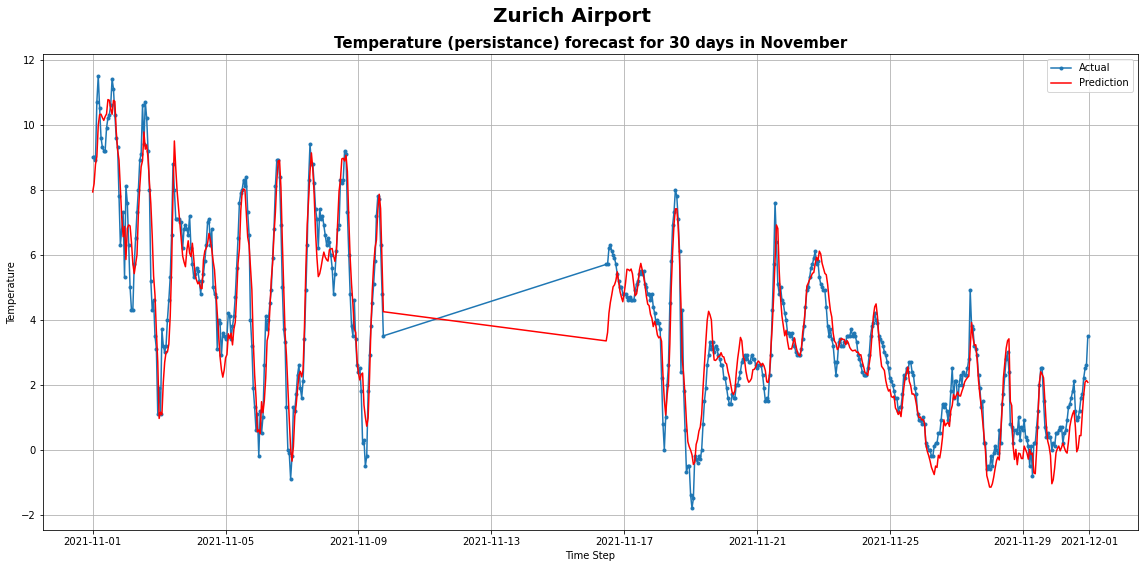

In [496]:
plt.figure(figsize=(16,8))
plt.plot(pred_act["actual"], marker='.', label="Actual")
plt.plot(pred_act["prediction"], 'r', label="Prediction")
plt.suptitle("Zurich Airport", fontsize=20, fontweight="bold")
plt.title(str(par)+" (persistance) forecast for "+str(test_days)+" "+str(d)+" in "+str(month), fontsize=15, fontweight="bold")
plt.ylabel(str(par))
plt.xlabel('Time Step')
plt.legend()
plt.grid()
plt.savefig(opath+"pers_ZRH_"+str(par)+"_"+str(month)+"_"+str(test_days)+' days_timstep.png',
            facecolor='white', bbox_inches = 'tight')
plt.tight_layout()
plt.show();

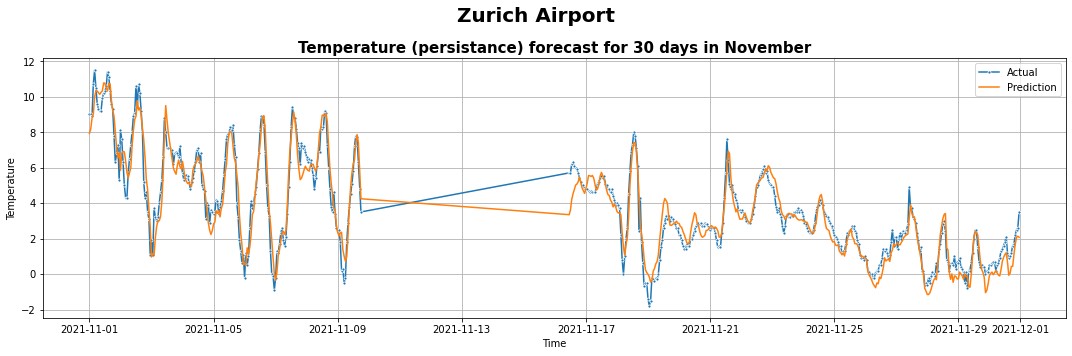

In [497]:
fig=plt.figure(figsize=(15,5))
plt.suptitle("Zurich Airport", fontsize=20, fontweight="bold")
sns.lineplot(x=pred_act.index, y=pred_act["actual"], label="Actual", marker=".")
sns.lineplot(x=pred_act.index, y=pred_act["prediction"], label="Prediction")
plt.title(str(par)+" (persistance) forecast for "+str(test_days)+" "+str(d)+" in "+str(month), fontsize=15, fontweight="bold")
plt.ylabel(str(par))
plt.xlabel('Time')
plt.grid()
fig.savefig(opath+"pers_ZRH_"+str(par)+"_"+str(month)+"_"+str(test_days)+' days.png',
            facecolor='white', bbox_inches = 'tight')
plt.tight_layout()
plt.show();